In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,confusion_matrix,accuracy_score
import pickle
import matplotlib.pyplot as plt

In [2]:
#Import the Cleaned dataset Files
try:
    df = pd.read_csv("Schema/Cleaned_data_of_chunk.csv")
except FileNotFoundError as e:
    print(f"Error {e}.")

In [3]:
#Check the first 5 rows.
df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,female,no,yes,no,1,no,no,dsl,no,...,no,no,no,no,month,yes,electronic,29.85,29.85,no
1,1,male,no,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one year,no,mailed,56.95,1889.50,no
2,2,male,no,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month,yes,mailed,53.85,108.15,yes
3,3,male,no,no,no,45,no,no,dsl,yes,...,yes,yes,no,no,one year,no,bank transfer,42.30,1840.75,no
4,4,female,no,no,no,2,yes,no,fiber optic,no,...,no,no,no,no,month,yes,electronic,70.70,151.65,yes


In [4]:
#Removed unwanted column.
df.drop(columns=["Unnamed: 0"],inplace=True)

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,female,no,yes,no,1,no,no,dsl,no,yes,no,no,no,no,month,yes,electronic,29.85,29.85,no
1,male,no,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed,56.95,1889.50,no
2,male,no,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month,yes,mailed,53.85,108.15,yes
3,male,no,no,no,45,no,no,dsl,yes,no,yes,yes,no,no,one year,no,bank transfer,42.30,1840.75,no
4,female,no,no,no,2,yes,no,fiber optic,no,no,no,no,no,no,month,yes,electronic,70.70,151.65,yes


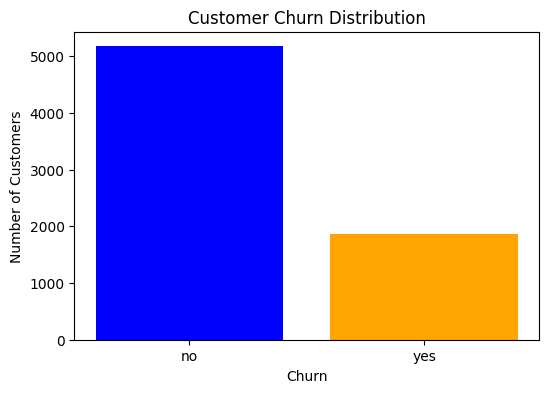

In [16]:
#Visualizatoin Graphs.

# (1) Churn Distribution

churn_count = df["Churn"].value_counts()

plt.figure(figsize=(6,4))
plt.bar(churn_count.index,churn_count.values,color=["blue","orange"])
plt.title("Customer Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.savefig("Graphs_Insights/Churn_Distribution.png",dpi=300,bbox_inches='tight')
plt.show()

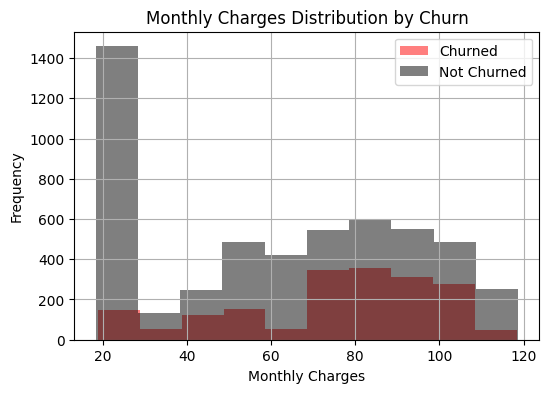

In [21]:
#Monthly Charges Distribution

churn_yes = df[df["Churn"]=="yes"]['MonthlyCharges']
churn_no = df[df["Churn"]=="no"]['MonthlyCharges']

plt.figure(figsize=(6,4))
plt.hist(churn_yes,alpha=0.5,label="Churned",color="red")
plt.hist(churn_no,alpha=0.5,label="Not Churned",color="black")
plt.title("Monthly Charges Distribution by Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.savefig("Graphs_Insights/Monthly_Charges_Distribution.png",dpi=300,bbox_inches='tight')
plt.show()

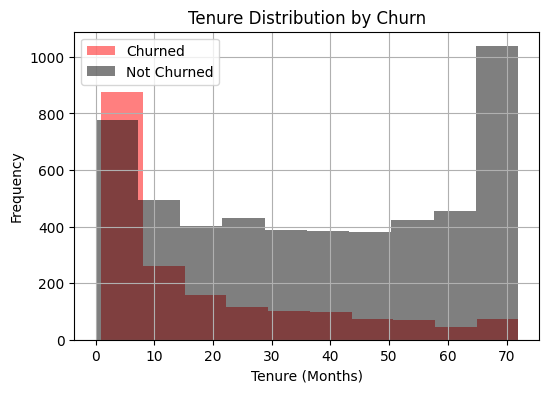

In [26]:
#Tenure vs Churn


churn_yes_t = df[df["Churn"]=="yes"]['tenure']
churn_no_t = df[df["Churn"]=="no"]['tenure']

plt.figure(figsize=(6,4))
plt.hist(churn_yes_t,alpha=0.5,label="Churned",color="red")
plt.hist(churn_no_t,alpha=0.5,label="Not Churned",color="black")
plt.title("Tenure Distribution by Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Frequency")
plt.grid(True)
plt.savefig("Graphs_Insights/Tenure_vs_Churn.png",dpi=300,bbox_inches='tight')
plt.legend()
plt.show()

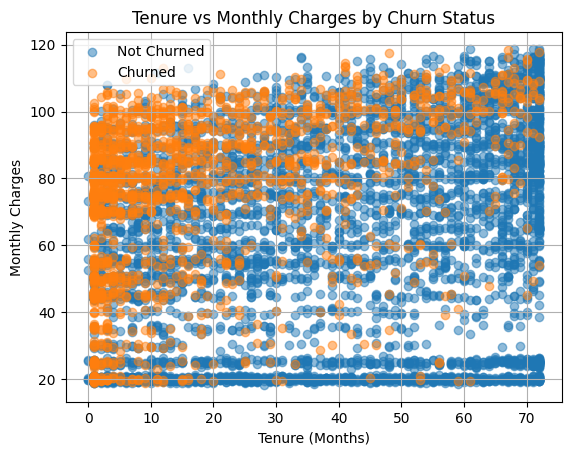

In [27]:
#Scatter Plot — Tenure vs Monthly Charges

churn_yes = df[df['Churn'] == 'yes']
churn_no = df[df['Churn'] == 'no']

plt.figure()

plt.scatter(churn_no['tenure'], churn_no['MonthlyCharges'], alpha=0.5, label='Not Churned')

plt.scatter(churn_yes['tenure'], churn_yes['MonthlyCharges'], alpha=0.5, label='Churned')

plt.title("Tenure vs Monthly Charges by Churn Status")
plt.xlabel("Tenure (Months)")
plt.ylabel("Monthly Charges")
plt.grid(True)

plt.legend()
plt.savefig("Graphs_Insights/Scatter_Plot_Tenure_vs_Monthly_Charges.png",dpi=300,bbox_inches='tight')
plt.show()

In [7]:
#Lets Saperate the Numaric and Objective columns.

temp1 = [] #Its Store Objective columns.
temp2 = [] #Its Store Numaric columns.

for i in df.columns:
    if df[i].dtype == "object":
        temp1.append(i)
    else:
        temp2.append(i)
print(temp1)
print(temp2)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
['tenure', 'MonthlyCharges', 'TotalCharges']


In [8]:
#lets encode all the labeled columns.

encode = {}
for i in temp1:
    lb = LabelEncoder()
    df[i] = lb.fit_transform(df[i])
    encode[i] = lb
print("Encoding is now completed")

Encoding is now completed


In [9]:
#Lets Split the data using train test split model
x = df.iloc[:,:-1]
y = df["Churn"]

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,train_size=0.2)

print("Train and test splited....")

Train and test splited....


In [10]:
#Lets scale down the data using the StandardScaler

std = StandardScaler()

x_train_scaled = std.fit_transform(x_train)
x_test_scaled = std.transform(x_test)

print("Data Scaled Successfully.....")

Data Scaled Successfully.....


In [11]:
x_train_scaled

array([[-1.0510156 , -0.42101963,  1.03469234, ..., -1.50907905,
         1.36167288,  1.50958465],
       [-1.0510156 , -0.42101963,  1.03469234, ...,  1.31643066,
         1.35675899, -0.43676658],
       [ 0.95146067, -0.42101963,  1.03469234, ..., -1.50907905,
        -0.3237908 ,  0.56840539],
       ...,
       [ 0.95146067, -0.42101963,  1.03469234, ...,  0.37459409,
        -1.42122585, -0.89589828],
       [ 0.95146067,  2.37518619, -0.96647087, ...,  0.37459409,
         1.14382383, -0.50225619],
       [ 0.95146067, -0.42101963, -0.96647087, ..., -0.56724248,
        -1.46545085, -0.82930801]], shape=(1408, 19))

In [12]:
#LogisticRegression Model

lr = LogisticRegression()

lr.fit(x_train_scaled, y_train)

lr_prediction = lr.predict(x_test_scaled)

lr_accuracy = round(accuracy_score(y_test,lr_prediction)*100,2)
print("Accuracy Score:-",lr_accuracy)
print("Mean Square Error (MSE) : ",round(mean_squared_error(y_test,lr_prediction),4))
print("Mean Absolute Error (MAE) : ",round(mean_absolute_error(y_test,lr_prediction),4))
print("Root Mean Square Error (MAE) : ",round(np.square(mean_squared_error(y_test,lr_prediction)),4))
print("R2 Score : ", round(r2_score(y_test,lr_prediction),4))  
print("Confusion Matrics : \n",confusion_matrix(y_test,lr_prediction)) 

Accuracy Score:- 80.32
Mean Square Error (MSE) :  0.1968
Mean Absolute Error (MAE) :  0.1968
Root Mean Square Error (MAE) :  0.0387
R2 Score :  -0.002
Confusion Matrics : 
 [[3690  432]
 [ 677  836]]


In [13]:
# #DecisionTreeClassifier Model

dtc = DecisionTreeClassifier()

dtc.fit(x_train_scaled, y_train)

dtc_prediction = dtc.predict(x_test_scaled)

dtc_accuracy = round(accuracy_score(y_test,dtc_prediction)*100,2)
print("Accuracy Score:-",dtc_accuracy)
print("Mean Square Error (MSE) : ",round(mean_squared_error(y_test,dtc_prediction),4))
print("Mean Absolute Error (MAE) : ",round(mean_absolute_error(y_test,dtc_prediction),4))
print("Root Mean Square Error (MAE) : ",round(np.square(mean_squared_error(y_test,dtc_prediction)),4))
print("R2 Score : ", round(r2_score(y_test,dtc_prediction),4)) 
print("Confusion Matrics : \n",confusion_matrix(y_test,dtc_prediction))  

Accuracy Score:- 71.94
Mean Square Error (MSE) :  0.2806
Mean Absolute Error (MAE) :  0.2806
Root Mean Square Error (MAE) :  0.0787
R2 Score :  -0.4285
Confusion Matrics : 
 [[3283  839]
 [ 742  771]]


In [14]:
# xgboost Model

xgb = XGBClassifier(
    random_state=42,
    n_estimators=300,
    learning_rate=0.1,
    max_depth=9,
    eval_metric='logloss'
)
xgb.fit(x_train_scaled, y_train)

xgb_prediction = xgb.predict(x_test_scaled)

xgb_accuracy = round(accuracy_score(y_test,xgb_prediction)*100,2)
print("Accuracy Score:-",xgb_accuracy)
print("Mean Square Error (MSE) : ",round(mean_squared_error(y_test,xgb_prediction),4))
print("Mean Absolute Error (MAE) : ",round(mean_absolute_error(y_test,xgb_prediction),4))
print("Root Mean Square Error (MAE) : ",round(np.square(mean_squared_error(y_test,xgb_prediction)),4))
print("R2 Score : ", round(r2_score(y_test,xgb_prediction),4)) 
print("Confusion Matrics : \n",confusion_matrix(y_test,xgb_prediction)) 

Accuracy Score:- 77.05
Mean Square Error (MSE) :  0.2295
Mean Absolute Error (MAE) :  0.2295
Root Mean Square Error (MAE) :  0.0527
R2 Score :  -0.1683
Confusion Matrics : 
 [[3608  514]
 [ 779  734]]


In [15]:
#KNeighborsClassifier Model

knc = KNeighborsClassifier(n_neighbors=30)

knc.fit(x_train_scaled, y_train)

knc_predictoin = knc.predict(x_test_scaled)

knc_accuracy = round(accuracy_score(y_test,knc_predictoin)*100,2)
print("Accuracy Score:-",knc_accuracy)
print("Mean Square Error (MSE) : ",round(mean_squared_error(y_test,knc_predictoin),4))
print("Mean Absolute Error (MAE) : ",round(mean_absolute_error(y_test,knc_predictoin),4))
print("Root Mean Square Error (MAE) : ",round(np.square(mean_squared_error(y_test,knc_predictoin)),4))
print("R2 Score : ", round(r2_score(y_test,knc_predictoin),4)) 
print("Confusion Matrics : \n",confusion_matrix(y_test,knc_predictoin)) 

Accuracy Score:- 77.8
Mean Square Error (MSE) :  0.222
Mean Absolute Error (MAE) :  0.222
Root Mean Square Error (MAE) :  0.0493
R2 Score :  -0.1303
Confusion Matrics : 
 [[3701  421]
 [ 830  683]]


In [16]:
#Lets Find the best model for our project.
models = {
    "Logistic Regression": (lr,lr_accuracy),
    "Decision Tree": (dtc,dtc_accuracy),
    "XGBoost": (xgb,xgb_accuracy),
    "KNN": (knc,knc_accuracy)
}

best_model_name = max(models, key=lambda k: models[k][1])
best_model = models[best_model_name][0]
best_accuracy = models[best_model_name][1]

print(f"Our best model is {best_model_name} anf the accuracy of it is {best_accuracy}.")

Our best model is Logistic Regression anf the accuracy of it is 80.32.


In [17]:
#User Input 

# gender = input("Enter Gender (male/female): ").lower()
# SeniorCitizen = input("Senior Citizen? (No,Yes):").lower()
# Partner = input("Partner? (yes/no): ").lower()
# Dependents = input("Dependents? (yes/no): ").lower()
# tenure = int(input("Enter Tenure (in months): "))
# PhoneService = input("Phone Service? (yes/no): ").lower()
# MultipleLines = input("Multiple Lines? (yes/no): ").lower()
# InternetService = input("Internet Service (dsl/fiber optic/no): ").lower()
# OnlineSecurity = input("Online Security? (yes/no): ").lower()
# OnlineBackup = input("Online Backup? (yes/no): ").lower()
# DeviceProtection = input("Device Protection? (yes/no): ").lower()
# TechSupport = input("Tech Support? (yes/no): ").lower()
# StreamingTV = input("Streaming TV? (yes/no): ").lower()
# StreamingMovies = input("Streaming Movies? (yes/no): ").lower()
# Contract = input("Contract Type (month/one year/two year): ").lower()
# PaperlessBilling = input("Paperless Billing? (yes/no): ").lower()
# PaymentMethod = input("Payment Method (electronic,mailed,bank transfer,credit card): ").lower()
# MonthlyCharges = float(input("Enter Monthly Charges: "))
# TotalCharges = float(input("Enter Total Charges: "))

gender = "male"
SeniorCitizen = "no"
Partner = "yes"
Dependents = "no"
tenure = 24
PhoneService = "yes"
MultipleLines = "no"
InternetService = "fiber optic"
OnlineSecurity = "yes"
OnlineBackup = "no"
DeviceProtection = "yes"
TechSupport = "no"
StreamingTV = "yes"
StreamingMovies = "yes"
Contract = "one year"
PaperlessBilling = "yes"
PaymentMethod = "credit card"
MonthlyCharges = 79.85
TotalCharges = 1916.40

new_data = pd.DataFrame([{
    'gender': gender,
    'SeniorCitizen':SeniorCitizen,
    'Partner': Partner,
    'Dependents': Dependents,
    'tenure': tenure,
    'PhoneService': PhoneService,
    'MultipleLines': MultipleLines,
    'InternetService': InternetService,
    'OnlineSecurity': OnlineSecurity,
    'OnlineBackup': OnlineBackup,
    'DeviceProtection': DeviceProtection,
    'TechSupport': TechSupport,
    'StreamingTV': StreamingTV,
    'StreamingMovies': StreamingMovies,
    'Contract': Contract,
    'PaperlessBilling': PaperlessBilling,
    'PaymentMethod': PaymentMethod,
    'MonthlyCharges': MonthlyCharges,
    'TotalCharges': TotalCharges
}])


In [18]:

temp_3 =[]
temp_4 = []

for i in new_data.columns:
    if new_data[i].dtype == "object":
        temp_3.append(i)
    else:
        temp_4.append(i)


In [19]:
#Lets encode the Categorical columns.
for i in temp_3:
    new_data[i] = encode[i].transform(new_data[i])
    
#Lets scal down all the data.
new_data = std.transform(new_data)

print(f"Lets use our best Accurate Model {best_model} for prediciton and the accuracy of this model is {best_accuracy}.")

final_prediction = best_model.predict(new_data)

if final_prediction[0] == 0:
    print("Customer will NOT churn")
else:
    print("Customer WILL churn")

Lets use our best Accurate Model LogisticRegression() for prediciton and the accuracy of this model is 80.32.
Customer will NOT churn


In [20]:
#pickle model.

models = {
    "encoder":encode,
    "label_encoder":lb,
    "standard_scaler":std,
    "final_model":best_model,
    "Model_name":best_model_name,
    "model_accuracy":best_accuracy,
    "column_name":temp_3,
}

with open("Model/customer_churn_pikle_model.pkl","wb") as f:
    pickle.dump(models,f) 
    print("Pickle Model Created.")

Pickle Model Created.
